In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [93]:
matches=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [3]:
matches.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3  
0     AY Dandekar       NJ Llong      NaN  
1  A Nand Kishore         S Ravi      NaN  
2     Nitin Menon      CK Nandan      NaN  
3    AK Chaudhary  C Shamshuddin      NaN  
4             NaN            NaN      NaN

In [4]:
delivery.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [5]:
matches.shape

(636, 18)

In [14]:
delivery.shape

(150460, 21)

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [7]:
matches.describe()

id       season  dl_applied  win_by_runs  win_by_wickets  \
count  636.000000   636.000000  636.000000   636.000000      636.000000   
mean   318.500000  2012.490566    0.025157    13.682390        3.372642   
std    183.741666     2.773026    0.156726    23.908877        3.420338   
min      1.000000  2008.000000    0.000000     0.000000        0.000000   
25%    159.750000  2010.000000    0.000000     0.000000        0.000000   
50%    318.500000  2012.000000    0.000000     0.000000        4.000000   
75%    477.250000  2015.000000    0.000000    20.000000        7.000000   
max    636.000000  2017.000000    1.000000   146.000000       10.000000   

       umpire3  
count      0.0  
mean       NaN  
std        NaN  
min        NaN  
25%        NaN  
50%        NaN  
75%        NaN  
max        NaN

In [8]:
matches.describe(include=['O'])

city        date           team1             team2     toss_winner  \
count      629         636             636               636             636   
unique      30         450              14                14              14   
top     Mumbai  2013-05-09  Mumbai Indians  Delhi Daredevils  Mumbai Indians   
freq        85           2              82                84              85   

       toss_decision  result          winner player_of_match  \
count            636     636             633             633   
unique             2       3              14             201   
top            field  normal  Mumbai Indians        CH Gayle   
freq             363     626              92              18   

                        venue          umpire1     umpire2  
count                     636              635         635  
unique                     35               44          45  
top     M Chinnaswamy Stadium  HDPK Dharmasena  SJA Taufel  
freq                       66               73          54

In [94]:
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN


In [95]:
delivery.fillna(0,inplace=True)     #filling all the NaN values with 0

In [12]:
matches.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3  
0     AY Dandekar       NJ Llong      NaN  
1  A Nand Kishore         S Ravi      NaN  
2     Nitin Menon      CK Nandan      NaN  
3    AK Chaudhary  C Shamshuddin      NaN  
4             NaN            NaN      NaN

In [19]:
print('Total Matches Played:',matches.shape[0])
print('\n Venues Played At: \n',matches['city'].value_counts())

Total Matches Played: 636

 Venues Played At: 
 Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Port Elizabeth     7
Cuttack            7
Ranchi             7
Raipur             6
Sharjah            6
Indore             5
Kochi              5
Kanpur             4
Kimberley          3
Nagpur             3
East London        3
Bloemfontein       2
Name: city, dtype: int64


In [22]:
print("Played in how many different city")
matches['city'].nunique()

Played in how many different city


30

In [25]:
matches['venue'].value_counts()

M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Maharashtra Cricket Association Stadium                 15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

In [23]:
print("Played in how many different venue")
matches['venue'].nunique()

Played in how many different venue


35

### Mumbai Indians(MI) defeated Delhi Daredevils(DD) with the highest run difference

In [29]:
matches[matches['win_by_runs']==matches['win_by_runs'].max()]

id  season   city        date           team1             team2  \
43  44    2017  Delhi  2017-05-06  Mumbai Indians  Delhi Daredevils   

         toss_winner toss_decision  result  dl_applied          winner  \
43  Delhi Daredevils         field  normal           0  Mumbai Indians   

    win_by_runs  win_by_wickets player_of_match             venue  \
43          146               0     LMP Simmons  Feroz Shah Kotla   

        umpire1    umpire2  umpire3  
43  Nitin Menon  CK Nandan      NaN

### team1 defeated team2 with the highest wins by wickets

In [30]:
matches[matches['win_by_wickets']==matches['win_by_wickets'].max()]

id  season        city        date             team1  \
2      3    2017      Rajkot  2017-04-07     Gujarat Lions   
34    35    2017  Chandigarh  2017-04-30  Delhi Daredevils   
71    72    2008      Mumbai  2008-04-27    Mumbai Indians   
119  120    2009   Cape Town  2009-04-19   Kings XI Punjab   
183  184    2010   Bangalore  2010-03-18  Rajasthan Royals   
298  299    2011      Mumbai  2011-05-20    Mumbai Indians   
376  377    2012      Jaipur  2012-05-20  Rajasthan Royals   
390  391    2013  Chandigarh  2013-04-10   Kings XI Punjab   
542  543    2015       Delhi  2015-04-26  Delhi Daredevils   
590  591    2016      Rajkot  2016-04-21     Gujarat Lions   

                           team2                  toss_winner toss_decision  \
2          Kolkata Knight Riders        Kolkata Knight Riders         field   
34               Kings XI Punjab              Kings XI Punjab         field   
71               Deccan Chargers              Deccan Chargers         field   
119             Delhi Daredevils             Delhi Daredevils         field   
183  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
298             Rajasthan Royals               Mumbai Indians           bat   
376               Mumbai Indians             Rajasthan Royals           bat   
390          Chennai Super Kings          Chennai Super Kings         field   
542  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
590          Sunrisers Hyderabad          Sunrisers Hyderabad         field   

     result  dl_applied                       winner  win_by_runs  \
2    normal           0        Kolkata Knight Riders            0   
34   normal           0              Kings XI Punjab            0   
71   normal           0              Deccan Chargers            0   
119  normal           1             Delhi Daredevils            0   
183  normal           0  Royal Challengers Bangalore            0   
298  normal           0             Rajasthan Royals            0   
376  normal           0               Mumbai Indians            0   
390  normal           0          Chennai Super Kings            0   
542  normal           0  Royal Challengers Bangalore            0   
590  normal           0          Sunrisers Hyderabad            0   

     win_by_wickets player_of_match  \
2                10         CA Lynn   
34               10  Sandeep Sharma   
71               10    AC Gilchrist   
119              10      DL Vettori   
183              10       JH Kallis   
298              10       SR Watson   
376              10        DR Smith   
390              10      MEK Hussey   
542              10        VR Aaron   
590              10         B Kumar   

                                                 venue          umpire1  \
2               Saurashtra Cricket Association Stadium      Nitin Menon   
34   Punjab Cricket Association IS Bindra Stadium, ...         YC Barde   
71                          Dr DY Patil Sports Academy        Asad Rauf   
119                                           Newlands        MR Benson   
183                              M Chinnaswamy Stadium      K Hariharan   
298                                   Wankhede Stadium      RE Koertzen   
376                             Sawai Mansingh Stadium  HDPK Dharmasena   
390         Punjab Cricket Association Stadium, Mohali        Aleem Dar   
542                                   Feroz Shah Kotla        M Erasmus   
590             Saurashtra Cricket Association Stadium       K Bharatan   

             umpire2  umpire3  
2          CK Nandan      NaN  
34         CK Nandan      NaN  
71        SL Shastri      NaN  
119        SD Ranade      NaN  
183        DJ Harper      NaN  
298       PR Reiffel      NaN  
376    C Shamshuddin      NaN  
390    C Shamshuddin      NaN  
542           S Ravi      NaN  
590  HDPK Dharmasena      NaN

### Teams mostly chose fielding affter tose win

In [31]:
matches['toss_decision'].value_counts()

field    363
bat      273
Name: toss_decision, dtype: int64

In [32]:
matches['toss_decision'].value_counts(normalize=True)

field    0.570755
bat      0.429245
Name: toss_decision, dtype: float64

In [34]:
matches.groupby('season')['toss_decision'].value_counts()

season  toss_decision
2008    field            32
        bat              26
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    field            48
        bat              25
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    field            41
        bat              19
2015    field            34
        bat              25
2016    field            49
        bat              11
2017    field            48
        bat              11
Name: toss_decision, dtype: int64

In [36]:
pd.crosstab(index=matches['season'],columns=matches['toss_decision'])

toss_decision  bat  field
season                   
2008            26     32
2009            35     22
2010            39     21
2011            25     48
2012            37     37
2013            45     31
2014            19     41
2015            25     34
2016            11     49
2017            11     48

<AxesSubplot:xlabel='season', ylabel='count'>

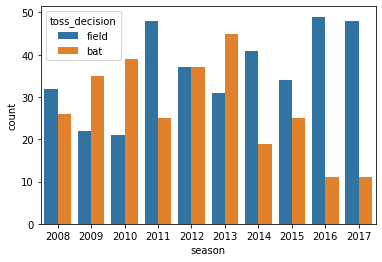

In [38]:
sns.countplot(x=matches['season'],hue=matches['toss_decision'])

In [41]:
px.histogram(data_frame=matches,x='season',color='toss_decision',barmode='group')

### Maximum Toss Winners


In [43]:
matches['toss_winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

<AxesSubplot:>

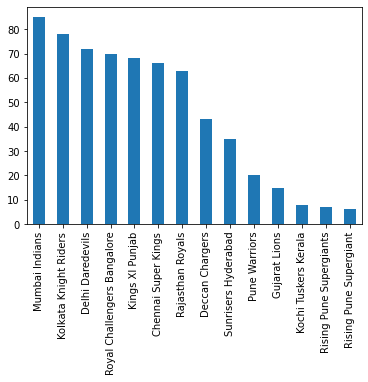

In [46]:
matches['toss_winner'].value_counts().plot(kind='bar')

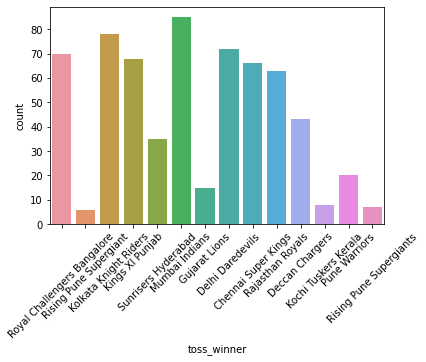

In [51]:
sns.countplot(x=matches['toss_winner'],)
plt.xticks(rotation=45)
plt.show()

In [49]:
px.histogram(data_frame=matches,x='toss_winner',barmode='group')

### teams made decision after wining toss

In [44]:
px.histogram(data_frame=matches,x='toss_winner',color='toss_decision',barmode='group')

### Is Toss Winner Also the Match Winner?


In [54]:
matches.shape

(636, 18)

In [53]:
df_win=matches[matches['toss_winner']==matches['winner']]
df_win.shape

(325, 18)

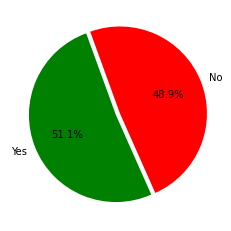

In [64]:
win=[df_win.shape[0],matches.shape[0]-df_win.shape[0]]
label=['Yes','No']
plt.pie(x=win,labels=label,explode=(0,0.05),autopct='%1.1f%%',colors=['g','r'],startangle=-250)
plt.show()

### match win , tose win, but what mostly select after tose win

In [65]:
df_win['toss_decision'].value_counts()

field    201
bat      124
Name: toss_decision, dtype: int64

<AxesSubplot:xlabel='toss_decision', ylabel='count'>

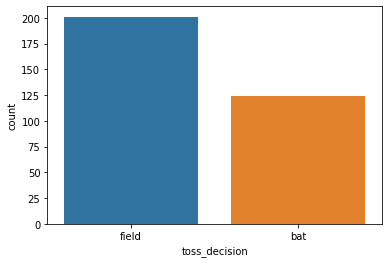

In [68]:
sns.countplot(x=df_win['toss_decision'])

### Matches played across each season¶


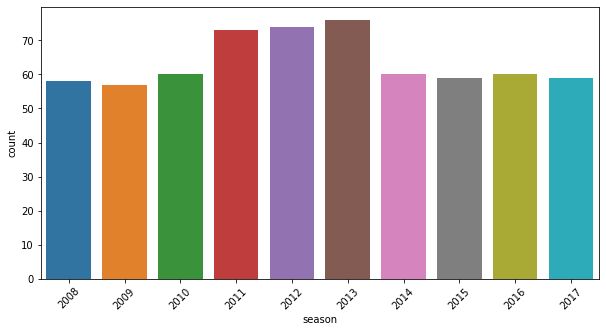

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(x=matches['season'],)
plt.xticks(rotation=45)
plt.show()

### Runs Across the Seasons¶


In [83]:
matches.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  
0     AY Dandekar       NJ Llong  
1  A Nand Kishore         S Ravi  
2     Nitin Menon      CK Nandan  
3    AK Chaudhary  C Shamshuddin  
4             NaN            NaN

In [84]:
deliverys.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [99]:
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
batsmen.head()

season  match_id  inning         batting_team                 bowling_team  \
0    2017         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1    2017         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2    2017         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3    2017         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4    2017         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   

   over  ball    batsman non_striker    bowler  ...  bye_runs  legbye_runs  \
0     1     1  DA Warner    S Dhawan  TS Mills  ...         0            0   
1     1     2  DA Warner    S Dhawan  TS Mills  ...         0            0   
2     1     3  DA Warner    S Dhawan  TS Mills  ...         0            0   
3     1     4  DA Warner    S Dhawan  TS Mills  ...         0            0   
4     1     5  DA Warner    S Dhawan  TS Mills  ...         0            0   

   noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
0            0             0             0           0           0   
1            0             0             0           0           0   
2            0             0             4           0           4   
3            0             0             0           0           0   
4            0             0             0           2           2   

   player_dismissed  dismissal_kind fielder  
0                 0               0       0  
1                 0               0       0  
2                 0               0       0  
3                 0               0       0  
4                 0               0       0  

[5 rows x 22 columns]

In [108]:
batsmen.groupby(['season'])['total_runs'].sum()

season
2008    17937
2009    16353
2010    18883
2011    21154
2012    22453
2013    22602
2014    18931
2015    18353
2016    18862
2017    18786
Name: total_runs, dtype: int64

<AxesSubplot:xlabel='season'>

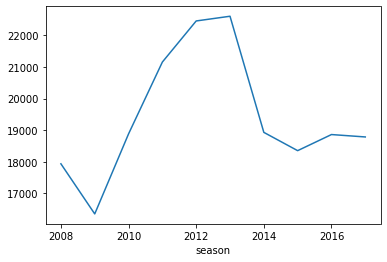

In [106]:
batsmen.groupby(['season'])['total_runs'].sum().plot()

In [129]:
px.histogram(batsmen,x='season',y='total_runs',histfunc='sum', color='season')

In [139]:
season_run=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season_run
px.line(data_frame=season_run, x='season',y='total_runs',markers=True)

### Average runs per match in each Season¶


In [140]:
season_run=batsmen.groupby(['season'])['total_runs'].mean().reset_index()
season_run
px.line(data_frame=season_run, x='season',y='total_runs',markers=True)

In [141]:
batsmen

season  match_id  inning                 batting_team  \
0         2017         1       1          Sunrisers Hyderabad   
1         2017         1       1          Sunrisers Hyderabad   
2         2017         1       1          Sunrisers Hyderabad   
3         2017         1       1          Sunrisers Hyderabad   
4         2017         1       1          Sunrisers Hyderabad   
...        ...       ...     ...                          ...   
150455    2016       636       2  Royal Challengers Bangalore   
150456    2016       636       2  Royal Challengers Bangalore   
150457    2016       636       2  Royal Challengers Bangalore   
150458    2016       636       2  Royal Challengers Bangalore   
150459    2016       636       2  Royal Challengers Bangalore   

                       bowling_team  over  ball        batsman    non_striker  \
0       Royal Challengers Bangalore     1     1      DA Warner       S Dhawan   
1       Royal Challengers Bangalore     1     2      DA Warner       S Dhawan   
2       Royal Challengers Bangalore     1     3      DA Warner       S Dhawan   
3       Royal Challengers Bangalore     1     4      DA Warner       S Dhawan   
4       Royal Challengers Bangalore     1     5      DA Warner       S Dhawan   
...                             ...   ...   ...            ...            ...   
150455          Sunrisers Hyderabad    20     2    Sachin Baby      CJ Jordan   
150456          Sunrisers Hyderabad    20     3    Sachin Baby      CJ Jordan   
150457          Sunrisers Hyderabad    20     4  Iqbal Abdulla    Sachin Baby   
150458          Sunrisers Hyderabad    20     5    Sachin Baby  Iqbal Abdulla   
150459          Sunrisers Hyderabad    20     6  Iqbal Abdulla    Sachin Baby   

          bowler  ...  bye_runs  legbye_runs  noball_runs  penalty_runs  \
0       TS Mills  ...         0            0            0             0   
1       TS Mills  ...         0            0            0             0   
2       TS Mills  ...         0            0            0             0   
3       TS Mills  ...         0            0            0             0   
4       TS Mills  ...         0            0            0             0   
...          ...  ...       ...          ...          ...           ...   
150455   B Kumar  ...         0            0            0             0   
150456   B Kumar  ...         0            0            0             0   
150457   B Kumar  ...         0            1            0             0   
150458   B Kumar  ...         0            0            0             0   
150459   B Kumar  ...         0            0            0             0   

        batsman_runs  extra_runs  total_runs  player_dismissed  \
0                  0           0           0                 0   
1                  0           0           0                 0   
2                  4           0           4                 0   
3                  0           0           0                 0   
4                  0           2           2                 0   
...              ...         ...         ...               ...   
150455             2           0           2                 0   
150456             0           0           0         CJ Jordan   
150457             0           1           1                 0   
150458             1           0           1                 0   
150459             4           0           4                 0   

        dismissal_kind  fielder  
0                    0        0  
1                    0        0  
2                    0        0  
3                    0        0  
4                    0        0  
...                ...      ...  
150455               0        0  
150456         run out  NV Ojha  
150457               0        0  
150458               0        0  
150459               0        0  

[150460 rows x 22 columns]

In [145]:
batsmen['total_runs'].value_counts().sort_index()

0    53305
1    62205
2    10253
3      597
4    17250
5      326
6     6486
7       38
Name: total_runs, dtype: int64

In [152]:
boundry=batsmen[(batsmen['total_runs']==4)  | (batsmen['total_runs']==6) ]
boundry.sample(5)

season  match_id  inning           batting_team         bowling_team  \
113760    2014       480       2       Rajasthan Royals     Delhi Daredevils   
39932     2009       170       2       Delhi Daredevils       Mumbai Indians   
102145    2013       431       1          Pune Warriors     Rajasthan Royals   
145210    2016       614       1  Kolkata Knight Riders        Gujarat Lions   
113082    2014       477       2         Mumbai Indians  Sunrisers Hyderabad   

        over  ball    batsman      non_striker       bowler  ...  bye_runs  \
113760     3     4  AM Rahane          KK Nair   WD Parnell  ...         0   
39932     10     1   V Sehwag        G Gambhir     AM Nayar  ...         0   
102145    20     7   MR Marsh          M Rawat  JP Faulkner  ...         0   
145210    12     3  YK Pathan  Shakib Al Hasan     PV Tambe  ...         0   
113082     6     2    BR Dunk        AT Rayudu    DJG Sammy  ...         0   

        legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
113760            0            0             0             4           0   
39932             0            0             0             6           0   
102145            0            0             0             6           0   
145210            0            0             0             4           0   
113082            0            0             0             4           0   

        total_runs  player_dismissed  dismissal_kind fielder  
113760           4                 0               0       0  
39932            6                 0               0       0  
102145           6                 0               0       0  
145210           4                 0               0       0  
113082           4                 0               0       0  

[5 rows x 22 columns]

In [154]:
boundry.groupby('season')['total_runs'].value_counts()

season  total_runs
2008    4             1726
        6              618
2009    4             1341
        6              504
2010    4             1729
        6              585
2011    4             1950
        6              634
2012    4             1932
        6              728
2013    4             2083
        6              677
2014    4             1591
        6              711
2015    4             1630
        6              689
2016    4             1643
        6              638
2017    4             1625
        6              702
Name: total_runs, dtype: int64

In [160]:
px.histogram(boundry,x='season',y='total_runs',histfunc='sum', color='total_runs',barmode='group')